In [23]:
import pandas as pd
badminton1 = pd.read_csv('processed_badminton1.csv', header='infer')

badminton1

,SHOT_ID,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITION IN AIR (X) metres,SHUTTLECOCK POSITION IN AIR (Y) metres,SHUTTLECOCK POSITION IN AIR (Z) metres,OUT_OF_COURT_SHOTS
0,1,4,1,10,40,0,4.075543,1.000000,1.662912,1
1,1,4,1,10,40,0,4.152007,1.000000,1.724866,1
2,1,4,1,10,40,0,4.228906,1.000000,1.788139,1
3,1,4,1,10,40,0,4.302100,1.000000,1.845245,1
4,1,4,1,10,40,0,4.376877,1.000000,1.904128,1
...,...,...,...,...,...,...,...,...,...,...
34707,250,4,4,10,60,10,8.885213,4.861395,0.941893,1
34708,250,4,4,10,60,10,8.898323,4.863706,0.739085,1
34709,250,4,4,10,60,10,8.919513,4.867443,0.529859,1
34710,250,4,4,10,60,10,8.935025,4.870178,0.316693,1


In [24]:
badminton2 = pd.read_csv('processed_badminton2.csv', header='infer')

badminton2

,SHOT_ID,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITION IN AIR (X) metres,SHUTTLECOCK POSITION IN AIR (Y) metres,SHUTTLECOCK POSITION IN AIR (Z) metres,OUT_OF_COURT_SHOTS
0,1,4,1,10,40,0,4.074748,1.000000,2.664781,1
1,1,4,1,10,40,0,4.152552,1.000000,2.727645,1
2,1,4,1,10,40,0,4.225975,1.000000,2.787371,1
3,1,4,1,10,40,0,4.302336,1.000000,2.847031,1
4,1,4,1,10,40,0,4.377311,1.000000,2.905658,1
...,...,...,...,...,...,...,...,...,...,...
56631,408,4,4,10,60,50,8.061748,8.840603,6.084177,0
56632,408,4,4,10,60,50,8.088022,8.871915,6.044289,0
56633,408,4,4,10,60,50,8.111243,8.899588,6.001045,0
56634,408,4,4,10,60,50,8.138342,8.931884,5.952024,0


In [30]:
# Verify crudely that none of the data contains cases where the shuttlecock does not cross the net
dataUntilNet = badminton1[badminton1['SHUTTLECOCK POSITION IN AIR (X) metres']>6.58] # 6.58 is the max distance from the end of court to the net
grouped = dataUntilNet.groupby('SHOT_ID')['SHUTTLECOCK POSITION IN AIR (Z) metres'].max() # Group by shot ID and find the max height of the shuttlecock when it is at the net
print("Below net for badminton1: " + str(grouped[grouped<1.55])) # 1.55 is the height of the net, so any shots where the shuttlecock does not cross the net will be displayed
dataUntilNet = badminton2[badminton2['SHUTTLECOCK POSITION IN AIR (X) metres']>6.58] # 6.58 is the max distance from the end of court to the net
grouped = dataUntilNet.groupby('SHOT_ID')['SHUTTLECOCK POSITION IN AIR (Z) metres'].max() # Group by shot ID and find the max height of the shuttlecock when it is at the net
print("Below net for badminton2: " + str(grouped[grouped<1.55])) # 1.55 is the height of the net, so any shots where the shuttlecock does not cross the net will be displayed

Below net for badminton1: Series([], Name: SHUTTLECOCK POSITION IN AIR (Z) metres, dtype: float64)
Below net for badminton2: Series([], Name: SHUTTLECOCK POSITION IN AIR (Z) metres, dtype: float64)


# Data Mining
## Step 1. Decide between individual prediction of x, y and z values, or predict x, y and z together
### 1.1. Are x, y and z related? (Raw values)

In [60]:
# Analyse the correlation between x and y values for shot 1
import math, random
%matplotlib inline

#get cosine similarity between x and y values
def dotproduct(v1, v2):
    return sum((a*b) for a, b in zip(v1, v2))
def length(v):
    length = math.sqrt(dotproduct(v, v))
    if(length==0):
        return 0.0000000000000001
    return length

def angle(v1, v2):
    return dotproduct(v1, v2) / (length(v1) * length(v2))

shots = []
i=0
while i <5:
    #generate random value within a range
    shots.append(random.randint(1, len(badminton1.index)))
    i+=1

for i in shots:
    shot = badminton1[badminton1['SHOT_ID']== i]
    print('Shot %d Cosine Similarity' % i)
    print('X and Y: ' + str(angle(shot['SHUTTLECOCK POSITION IN AIR (X) metres'], shot['SHUTTLECOCK POSITION IN AIR (Y) metres'])))
    print('X and Z: ' + str(angle(shot['SHUTTLECOCK POSITION IN AIR (X) metres'], shot['SHUTTLECOCK POSITION IN AIR (Z) metres'])))
    print('Y and Z: ' + str(angle(shot['SHUTTLECOCK POSITION IN AIR (Y) metres'], shot['SHUTTLECOCK POSITION IN AIR (Z) metres'])))
    # print('Shot angle: ' + str(statistics.mean(shot['SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)'])))
    # print

#Observation: Low cosine similarities between raw X, Y and Z values
# This suggests that with the raw values of X, Y and Z, 

Shot 33412 Cosine Similarity
X and Y: 0.0
X and Z: 0.0
Y and Z: 0.0
Shot 17517 Cosine Similarity
X and Y: 0.0
X and Z: 0.0
Y and Z: 0.0
Shot 30979 Cosine Similarity
X and Y: 0.0
X and Z: 0.0
Y and Z: 0.0
Shot 11644 Cosine Similarity
X and Y: 0.0
X and Z: 0.0
Y and Z: 0.0
Shot 1724 Cosine Similarity
X and Y: 0.0
X and Z: 0.0
Y and Z: 0.0


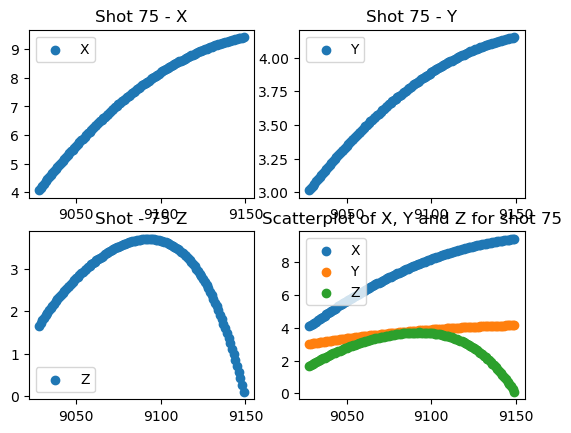

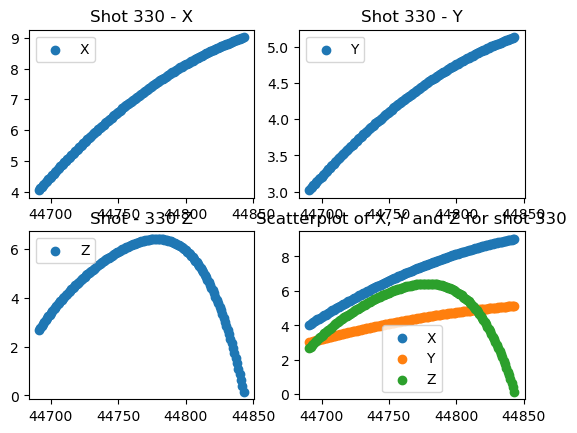

In [78]:
# Visualise the lack of correlation or non-linear relationship between X, Y and Z values
import matplotlib.pyplot as plt
import random
fig, axs = plt.subplots(2,2)
i = random.randint(1, max(badminton1['SHOT_ID']))
shot = badminton1[badminton1['SHOT_ID'] == i]
shotx = shot['SHUTTLECOCK POSITION IN AIR (X) metres']
shoty = shot['SHUTTLECOCK POSITION IN AIR (Y) metres']
shotz = shot['SHUTTLECOCK POSITION IN AIR (Z) metres']
axs[0][0].scatter(shot.index, shotx, label='X')
axs[0][1].scatter(shot.index, shoty, label='Y')
axs[1][0].scatter(shot.index, shotz, label='Z')

# Set legends and titles for each plot
axs[0][0].legend()
axs[0][0].set_title('Shot %d - X' % i)

axs[0][1].legend()
axs[0][1].set_title('Shot %d - Y'% i)

axs[1][0].legend()
axs[1][0].set_title('Shot - %d Z'% i)

plt.scatter(shot.index,shotx, label='X')
plt.scatter(shot.index,shoty, label='Y')
plt.scatter(shot.index,shotz, label='Z')
plt.legend()
plt.title('Scatterplot of X, Y and Z for shot %d' %i)
plt.show()

# Similarly for badminton2
fig, axs = plt.subplots(2,2)
i = random.randint(1, max(badminton2['SHOT_ID']))
shot = badminton2[badminton2['SHOT_ID'] == i]
shotx = shot['SHUTTLECOCK POSITION IN AIR (X) metres']
shoty = shot['SHUTTLECOCK POSITION IN AIR (Y) metres']
shotz = shot['SHUTTLECOCK POSITION IN AIR (Z) metres']
axs[0][0].scatter(shot.index, shotx, label='X')
axs[0][1].scatter(shot.index, shoty, label='Y')
axs[1][0].scatter(shot.index, shotz, label='Z')

# Set legends and titles for each plot
axs[0][0].legend()
axs[0][0].set_title('Shot %d - X' % i)

axs[0][1].legend()
axs[0][1].set_title('Shot %d - Y'% i)

axs[1][0].legend()
axs[1][0].set_title('Shot - %d Z'% i)

plt.scatter(shot.index,shotx, label='X')
plt.scatter(shot.index,shoty, label='Y')
plt.scatter(shot.index,shotz, label='Z')
plt.legend()
plt.title('Scatterplot of X, Y and Z for shot %d' %i)
plt.show()


### 1.2. Are x, y and z related? (delta)
Feature creation to explore correlation - generate the changes in x, y and z between the first n data points of each shot

In [106]:
# Find the lowest number of points taken for the shuttlecock to reach the shot's peak (separately for 1.6m and 2.6m shots)
# This is to find the maximum number of points that can be used to predict the peak of the shuttlecock

# For badminton1 (1.6m shots)
bdm1_grouped = badminton1.groupby('SHOT_ID')
bdm1_peaks = bdm1_grouped['SHUTTLECOCK POSITION IN AIR (Z) metres'].max()

peak_index = []
first_shot_index = []
points_to_peak = []
min_points_to_peak = 0
for i in range(1, len(bdm1_grouped)+1): # iterate through each peak
    peak_value = bdm1_peaks[i]
    peak_records = badminton1[(badminton1['SHOT_ID'] == i) & (badminton1['SHUTTLECOCK POSITION IN AIR (Z) metres'] == peak_value)]
    peak_index.extend(peak_records.index.tolist())
    first_shot_index.extend(bdm1_grouped.head(1).index.tolist())
    points_to_peak.append(peak_index[i-1] - first_shot_index[i-1])
    if i == 1:
        min_points_to_peak = points_to_peak[i-1]
    else:
        if points_to_peak[i-1] < min_points_to_peak:
            min_points_to_peak = points_to_peak[i-1]
print("badminton1 data (1.6m shots)")
print("Peak Index:", peak_index)
print("Points to Peak:", points_to_peak)
print("Min points to peak:", min_points_to_peak)

# For badminton2 (2.6m shots)
bdm2_grouped = badminton2.groupby('SHOT_ID')
bdm2_peaks = bdm2_grouped['SHUTTLECOCK POSITION IN AIR (Z) metres'].max()

peak_index = []
first_shot_index = []
points_to_peak = []
min_points_to_peak = 0
for i in range(1, len(bdm2_grouped)+1): # iterate through each peak
    peak_value = bdm2_peaks[i]
    peak_records = badminton2[(badminton2['SHOT_ID'] == i) & (badminton2['SHUTTLECOCK POSITION IN AIR (Z) metres'] == peak_value)]
    peak_index.extend(peak_records.index.tolist())
    first_shot_index.extend(bdm2_grouped.head(1).index.tolist())
    points_to_peak.append(peak_index[i-1] - first_shot_index[i-1])
    if i == 1:
        min_points_to_peak = points_to_peak[i-1]
    else:
        if points_to_peak[i-1] < min_points_to_peak:
            min_points_to_peak = points_to_peak[i-1]
print("\nbadminton2 data (2.6m shots)")
print("Peak Index:", peak_index)
print("Points to Peak:", points_to_peak)
print("Min points to peak:", min_points_to_peak)


badminton1 data (1.6m shots)
Peak Index: [65, 185, 309, 432, 553, 675, 796, 919, 1040, 1163, 1284, 1406, 1529, 1651, 1773, 1893, 2016, 2139, 2261, 2382, 2504, 2626, 2749, 2870, 2993, 3115, 3236, 3359, 3480, 3604, 3724, 3847, 3967, 4091, 4213, 4335, 4456, 4577, 4701, 4823, 4945, 5066, 5189, 5310, 5433, 5555, 5675, 5798, 5920, 6042, 6164, 6288, 6410, 6530, 6653, 6776, 6896, 7019, 7140, 7264, 7386, 7507, 7628, 7751, 7872, 7994, 8116, 8240, 8362, 8483, 8605, 8727, 8849, 8970, 9093, 9215, 9337, 9458, 9580, 9702, 9824, 9947, 10069, 10191, 10313, 10435, 10556, 10678, 10801, 10923, 11045, 11166, 11288, 11411, 11555, 11704, 11853, 12002, 12151, 12301, 12449, 12598, 12748, 12897, 13046, 13195, 13344, 13492, 13640, 13790, 13938, 14089, 14237, 14385, 14536, 14685, 14834, 14983, 15131, 15280, 15430, 15579, 15727, 15876, 16026, 16174, 16323, 16472, 16621, 16770, 16919, 17068, 17217, 17367, 17515, 17664, 17814, 17962, 18112, 18260, 18409, 18559, 18707, 18856, 19004, 19154, 19303, 19452, 19601, 19751,

Since both badminton1 and badminton2 data have shots that reach their peak after a maximum of 63 data points, we will use n <= 63 for the subsequent calculations and predictions.

Feature creation: 
Take the changes in x, y and z between each shot's first 63 data points and identify any relationship between the individual axes' changes. Correlate this with the Euclidean Distance between each point too.

Hypotheses: 
1. For each shot, Z influences the magnitude of the change in X and Y.
2. The rate of change of X and Y are inversely related to the rate of change of Z
3. The rate of change of X and Y are related (rate of change when normalised against its final X and Y)

In [107]:
# For badminton1
bdm1_delta_x = []
bdm1_delta_y = []
bdm1_delta_z = []